Homework Group A
## Osama Al Kamel / Mtr Num: 3141575
## Joshua Oldridge / Mtr Num: 3140770
---

## Exercise on Machine Learning 101 - Part 1
---
Instructions are given in <span style="color:blue">blue</span> color.

In this exercise, we will be looking at clinical data from patients that suffered from some type of cardiovascular disease (e.g., heart attack), which may or may not have caused the patient's death (heart failure).

Our objective is to train a classifier that predicts under which circumstances a cardiovascular disease is most likely to be fatal.

* <div style="color:blue">The folder <code>/data</code>, next to this exercise, contains the file <code>Heart_Failure.csv</code>. Your first task will be to read the data into a <code>DataFrame</code>. Make sure to import any necessary libraries, too.</div>

In [232]:
# Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

The following is needed for **reproducibility** (see [here](https://www.mikulskibartosz.name/how-to-set-the-global-random_state-in-scikit-learn/), but also [here](https://scikit-learn.org/stable/faq.html#how-do-i-set-a-random-state-for-an-entire-execution)):

In [233]:
np.random.seed(42)

In [234]:
# Your solution goes here:
data = pd.read_csv("./data/Heart_Failure.csv")

* <div style="color:blue">Familiarize yourself with the data. Print out the first 5 rows of the <code>DataFrame</code>.</div>

In [235]:
# Your solution goes here:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


* <div style="color:blue">Find out how many samples the <code>DataFrame</code> contains.</div>

In [236]:
# Your solution goes here:
data.shape

(299, 13)

As for the different features and labels, and what their respective meanings are:

* **`age`** - patient's age at the time of heart failure
* **`anaemia`** - decrease of red blood cells or hemoglobin (boolean)
* **`creatinine_phosphokinase`** - level of the CPK enzyme in the blood (mcg/L)
* **`diabetes`** - if the patient has diabetes (boolean)
* **`ejection_fraction`** - percentage of blood leaving the heart at each contraction
* **`high_blood_pressure`** - if the patient has hypertension (boolean)
* **`platelets`** - platelets in the blood (kiloplatelets/mL)
* **`serum_creatinine`** - level of serum creatinine in the blood (mg/dL)
* **`serum_sodium`** - level of serum sodium in the blood (mEq/L)
* **`sex`** - patients's sex (binary: '0' - female or '1' - male)
* **`smoking`** - if the patient smokes (boolean)
* **`time`** - follow-up period (days)
* **`DEATH_EVENT`** - if the patient deceased during the follow-up period (boolean)

In regards to cleaning the data, there is not much left to do for you, except for removing unneeded columns.

* <div style="color:blue">Remove the <code>time</code> column from the <code>DataFrame</code>.</div>

In [237]:
# Your solution goes here:
data.drop(['time'],axis=1,inplace=True)
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,0


* <div style="color:blue">Split your data into a training set (containing 75% of the original data) and a testing set (including 25% of the original data). Furthermore, make sure that the label values' distribution is the same for all your sub-sets (<code>DEATH_EVENT</code>).</div>

In [238]:
# Your solution goes here:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['DEATH_EVENT'], axis=1),data['DEATH_EVENT'], test_size=0.25, stratify=data['DEATH_EVENT'])

* <div style="color:blue">Follow the suggestions of <b><a html="https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html">this</a></b> cheat sheet to select an estimator that fits the problem and the data.</div>
* <div style="color:blue">Remember that we are trying to find out what combination of feature observations will result in a <code>DEATH_EVENT</code>.</div>
* <div style="color:blue">Create an instance of the respective model with the help of <code>scikit-learn</code>.</div>

**Note**: If your model selection process proposes an estimator you are not yet familiar with, try to remember the general **fit-predict-paradigm** utilized by `scikit-learn`. Also, keep in mind that the documentation provides plentiful information about each classifier, including a list of parameters and default values.

In [239]:
# Your solution goes here:

#Model was not very good, trying other ones below
from sklearn import svm
model = svm.SVC()

* <div style="color:blue">Train the model, using your training data.</div>

In [240]:
# Your solution goes here:
model.fit(X_train,y_train)

SVC()

* <div style="color:blue">Use your trained model to make predictions on the <b>test</b> set.</div>

In [241]:
# Your solution goes here:
predictions_on_training_data = model.predict(X_test)


* <div style="color:blue">Derive the accuracy metric from your predictions.</div>

In [242]:
# Your solution goes here:
accuracy_score(y_test,predictions_on_training_data)

0.68

* <div style="color:blue">Plot a confusion matrix that shows the number of predicted labels in comparison to the actual labels.</div>

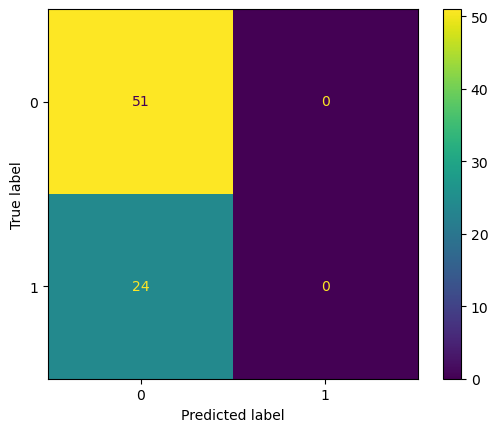

In [243]:
# Your solution goes here:
cm = confusion_matrix(y_test, predictions_on_training_data)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

* <div style="color:blue">Use the confusion matrix to fill out the following table:</div>

||**True Positive**|**True Negative**|**False Positive**|**False Negative**|
|-|:-:|:-:|:-:|:-:|
|Number of Predictions|0|51|0|24|

* <div style="color:blue">Generate a classification report for your model.</div>

**Note**: Depending on your classifier, your chosen parameters, or due to random effects, a warning message might pop up that says: `Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.` Please ignore this message for now and possibly make use of it when evaluating your model.

In [244]:
# Your solution goes here:
re = classification_report(y_test, predictions_on_training_data)
re

c:\Users\smart\miniforge-pypy3\envs\dl4cv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\smart\miniforge-pypy3\envs\dl4cv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\smart\miniforge-pypy3\envs\dl4cv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

'              precision    recall  f1-score   support\n\n           0       0.68      1.00      0.81        51\n           1       0.00      0.00      0.00        24\n\n    accuracy                           0.68        75\n   macro avg       0.34      0.50      0.40        75\nweighted avg       0.46      0.68      0.55        75\n'

Output was not formated correctly

                  precision    recall  f1-score   support

            0       0.68      1.00      0.81        51          
            1       0.00      0.00      0.00        24
      accuracy                          0.68        75
      macro avg     0.34      0.50      0.40        75
      weighted avg  0.46      0.68      0.55        75

* <div style="color:blue">Use the derived metrics (accuracy, confusion matrix, precision, recall, f1-score) to critically evaluate your model's quality. Is it well suited to fulfill its initial purpose?</div>

**Note**: Before you start working on your answer, have a look at [this](https://ml-cheatsheet.readthedocs.io/en/latest/glossary.html#) website and search for the term **Null Accuracy**. Use the definition to support your discussion.

*Your solution goes here:*

<div style = "color:lightblue">
The accuracy of the model is above 50%, which is a postiive sign that the model is not geussing, but the model was not able to catch any true positives, so it was not able to corretly guess any case where death would occur.<br>
The recall score score for '0' is 1.00, so it was able to guess all cases, but precision is not as good.<br>
All the parameters for '1' are zero, so it did not guess any 1s<br>
The model is only guessing zeros for all the data, given that zero is the most common output, so that is how it was able to achieve the accuracy that it has, not becuase it is any good at predicting death from heart disease.<br>
The model is not sutied to be used in a clinical setting as it is not good at predicing death from heart disease and always guesses 'no death'
</div>

**Final Remark:** We are trying to give you a realistic indication of what you might expect when tackling data science tasks ... So, you might now either be put off in this particular case OR ready to plough on, maybe after having worked on the second one of this week's exercises and try another classifier which seems more promising (you might also want to follow the cheat sheet for algorithm selection a little further) ...

In [245]:
# Ok, I'm ploughing on and I am giving this another try ... (maybe)

# We can go through the cheat sheet provided above and see that the next model to use is the KNeighbors classifier
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train,y_train)
predictions_on_training_data = model.predict(X_test)
accuracy_score(y_test,predictions_on_training_data)

0.6133333333333333

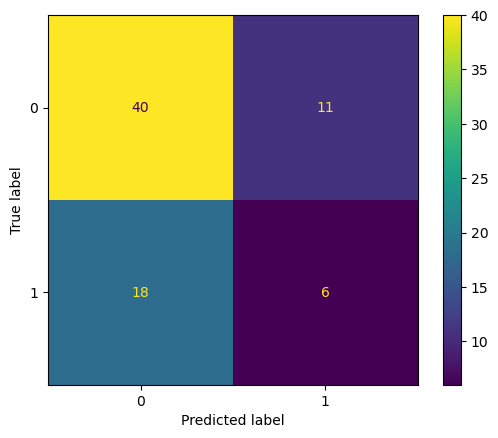

In [246]:
#as we can see, we have similiar accuracy to linear SVC

cm = confusion_matrix(y_test, predictions_on_training_data)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


<div style = "color:lightblue">But the model is able to give a more varied collection of gusses instead of always guessing zero